# Data Science & Business Analytics Task - 1

## Topic - Supervised Learning

### Created by - Mayuri Desai

### Problem Statement - To predict the percentage of an student based on the no. of study hours.

### Method used - Linear Regression 

#### Step 1 : Importing Libraries

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#### Step 2 : Loading the Dataset

In [2]:
data = "http://bit.ly/w-data" # importing dataset using url
df= pd.read_csv(data) # reading the dataset using DataFrame
df.head() # to check the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape # to check the total no. of rows and columns

(25, 2)

In [4]:
df.info() # to get the info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull() # to check weather the dataset contains any NULL value or NOT

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### scatter plot - to check the nature of dataset

plotted a scatter plot of Hours vs Scores to check the nature of dataset using matplotib library and style module from 
matplotlib. As plot is near about linearly natured thus we can apply linear regression algorithm for the given problem
statement

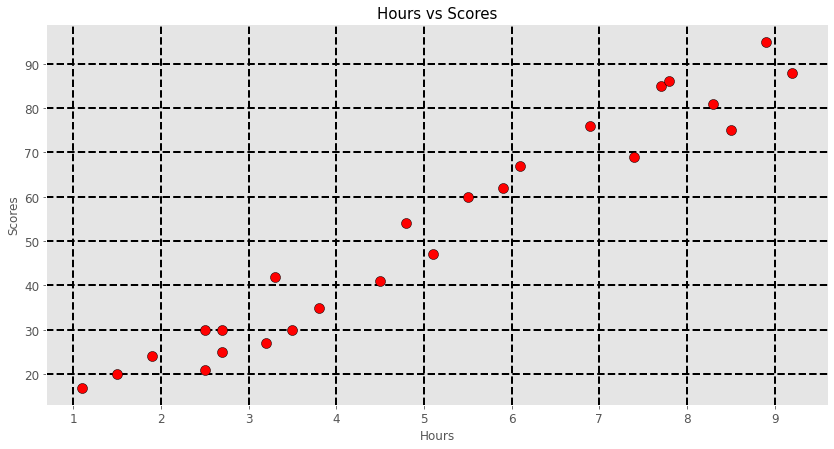

In [19]:
style.use('ggplot')
plt.figure(figsize = (14,7))
plt.scatter(df['Hours'], df['Scores'], color = 'r', s = 100, edgecolor = 'k')
plt.title("Hours vs Scores", fontsize = 15)
plt.xlabel("Hours", fontsize = 12)
plt.ylabel("Scores", fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(color = 'k', linewidth = 2, linestyle = '--')
plt.show()

### correlation plot

In [7]:
df.corr() # to check the relation between variables (Hours & Scores)

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


plotted a Heatmap to represent the correlation of variables in graphical format

Key Points :
    1. -1 : perfect negative correlation (ex. x-increase then y-decrease & vice-versa)
    2.  0 : No correlation (ex. x-increase then no affect on y & vice-versa)
    3. +1 : perrfect positive (ex. x-increase then y-increase & vice-versa)
        
Here in our case, correlation is near aboout +1 that means as many number of study Hours that much good score students scored.

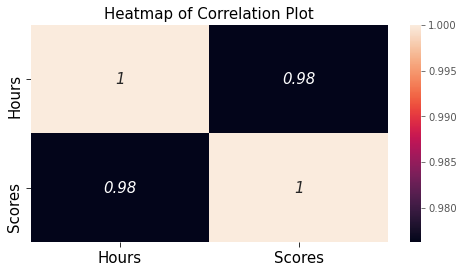

In [8]:
plt.figure(figsize = (8,4))
annot_kws = {'fontsize' : 15, 'fontstyle' : "italic"}
ax = sns.heatmap(df.corr(), annot = True, annot_kws = annot_kws)
ax.tick_params(size = 5, color = 'k', labelsize = 15, labelcolor = 'k')
plt.title("Heatmap of Correlation Plot", fontsize = 15)
plt.show()

### Linear Regression

#### Step 3 : Split Data

splitting data into dependent and independent variables. The X represents independent variable while y represents dependent 
variable. Here in our case, indepenent variable is Hours and dependent variable is Scores.

In [9]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (25, 1)
Shape of y :  (25,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (20, 1)
Shape of X_test :  (5, 1)
Shape of y_train :  (20,)
Shape of y_test :  (5,)


#### Step 4 : ML model training

used inbuilt scikit learn library for traning ML model using Linear Regression Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("ML Model Trained Successfully")

ML Model Trained Successfully


#### Step 5 : Checking the accuracy

In [12]:
print(lr.score(X_test, y_test)*100,"%") # testing the accuracy of ML model

94.54906892105356 %


ready to deploy the ML model with maximum good accuracy i.e 94.54 %

#### Step 6 : predict the value

In [14]:
y_pred = rd.predict(X_test) # predicting the value using test data
y_pred

array([17.18169996, 33.89456361, 75.18516794, 27.01279622, 60.43852354])

In [15]:
y_test # actual data / main data

array([20, 27, 69, 30, 62], dtype=int64)

#### comparing the values

comparing both values with each other i.e Predicted Value and Actual Value
Created a table to easily identify and compare values

In [16]:
col_names = {"Actual Values" : y_test, "Predicted Values" : y_pred}
df1 = pd.DataFrame.from_dict(col_names)
df1

,Actual Values,Predicted Values
0,20,17.181700
1,27,33.894564
2,69,75.185168
3,30,27.012796
4,62,60.438524


#### Step 7 : Predicting the value

predicted score if a student studies for 9.25 hrs/day

In [17]:
study_hrs = [[9.25]]
predicted_score = lr.predict(study_hrs)
print("Study Hours : ",study_hrs,"hrs")
print("Predicted Score : ",predicted_score,"%")

Study Hours :  [[9.25]] hrs
Predicted Score :  [93.69173249] %


Thus, predicted score is 93.69 % if student studies for 9.25 hrs/day

#### Step 8 : Checking the error

checking the error using Mean Square Error (MSE) method and then 
to get actual % error I have used Root Mean Square Error (RMSE) method for which I have used square root function 
from numpy library as np.sqrt

In [18]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Square Error : ", mse)
print("Root Mean Square Error : ", rmse)

Mean Square Error :  21.01914402727752
Root Mean Square Error :  4.584664003749623


Hence, we have got an error of 4.64 %

## THANK YOU!!